In [1]:
import numpy as np
import cv2
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import metrics


In [2]:
# Load the five images



img1 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pianoroll_matplotlib/Btayhi_Isbahan.mxl.png', 0)
img2 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pianoroll_matplotlib/Btayhi_Istihlal.mxl.png', 0)
img3 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pianoroll_matplotlib/Btayhi_Maya.mxl.png', 0)
img4 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pianoroll_matplotlib/Btayhi_Raml_Maya.mxl.png', 0)
img5 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pianoroll_matplotlib/Btayhi_Rasd_Dayl.mxl.png', 0)


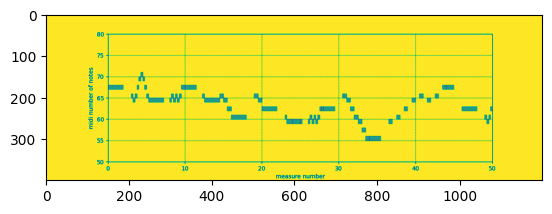

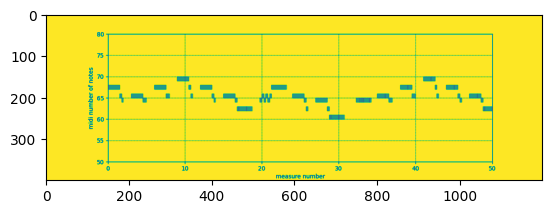

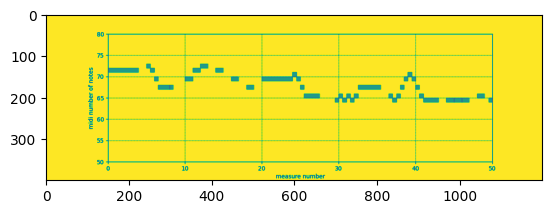

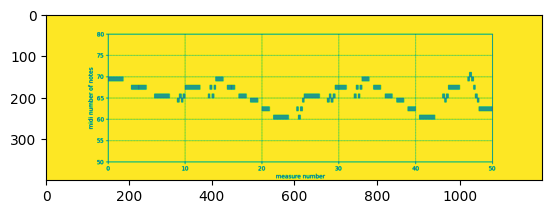

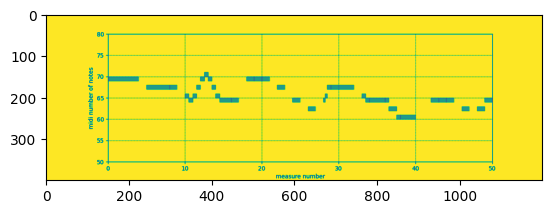

In [3]:
# show the images
images = [img1, img2, img3, img4, img5]
for i in images:
    imgplot = plt.imshow(i)
    plt.show()


# multiple similarities scores

In [4]:
# images = [img1, img2, img3, img4, img5]

# ssim_scores = np.zeros((5, 5))
# nrmse_scores = np.zeros((5, 5))
# psnr_scores = np.zeros((5, 5))
# mssim_scores = np.zeros((5, 5))
# for i in range(len(images)):
#     for j in range(i+1, len(images)):
#         # Compute the similarity scores using four different metrics
#         ssim = metrics.structural_similarity(images[i], images[j])
#         ssim_scores[i, j] = ssim
#         ssim_scores[j, i] = ssim
#         nrmse = metrics.normalized_root_mse(images[i], images[j])
#         nrmse_scores[i, j] = nrmse
#         nrmse_scores[j, i] = nrmse
#         psnr = metrics.peak_signal_noise_ratio(images[i], images[j])
#         psnr_scores[i, j] = psnr
#         psnr_scores[j, i] = psnr
#         mssim = metrics.mean_squared_error(images[i], images[j])
#         mssim_scores[i, j] = mssim
#         mssim_scores[j, i] = mssim

# # Set the diagonal elements of scores to 1
# np.fill_diagonal(ssim_scores, 1)
# np.fill_diagonal(nrmse_scores, 1)
# np.fill_diagonal(psnr_scores, 1)
# np.fill_diagonal(mssim_scores, 1)


# #scale all the scores
# min_score_ssim = np.min(ssim_scores)
# max_score_ssim = np.max(ssim_scores)
# scaled_ssim_scores = (ssim_scores - min_score_ssim) / \
#     (max_score_ssim - min_score_ssim)


# min_score_nrmse = np.min(nrmse_scores)
# max_score_nrmse = np.max(nrmse_scores)
# scaled_nrmse_scores = (nrmse_scores - min_score_nrmse) / \
#     (max_score_nrmse - min_score_nrmse)


# min_score_psnr = np.min(psnr_scores)
# max_score_psnr = np.max(psnr_scores)
# scaled_psnr_scores = (psnr_scores - min_score_psnr) / \
#     (max_score_psnr - min_score_psnr)

# min_score_mssim = np.min(mssim_scores)
# max_score_mssim = np.max(mssim_scores)
# scaled_mssim_scores = (mssim_scores - min_score_mssim) / \
#     (max_score_mssim - min_score_mssim)


# print(type(scaled_nrmse_scores))


In [5]:
# print(type(scaled_nrmse_scores))

# print(scaled_nrmse_scores.var())


In [6]:
# # Display the SSIM scores
# scores_list = [scaled_ssim_scores, scaled_nrmse_scores, scaled_psnr_scores, scaled_mssim_scores]
# scores_list_name = ["scaled_ssim_scores", "scaled_nrmse_scores",
#                "scaled_psnr_scores", "scaled_mssim_scores"]


# for i in range(0, len(scores_list)):
# # Create a heatmap using seaborn
#     sns.heatmap(scores_list[i], annot=True, cmap='Blues')
#     # Set the title and axis labels
#     plt.title(scores_list_name[i])
#     plt.xlabel('Image ID')
#     plt.ylabel('Image ID')
#     # Show the plot
#     plt.show()


# histogram similarity approach

In [7]:
# create histogram
from skimage import io, color, exposure
import numpy as np

histograms = [exposure.histogram(img)[0] for img in images]


# Compute correlation matrix
num_images = len(images)
corr_matrix = np.zeros((num_images, num_images))
for i in range(num_images):
    for j in range(i, num_images):
        corr_matrix[i, j] = corr_matrix[j, i] = np.corrcoef(
            histograms[i], histograms[j])[0, 1]

print(corr_matrix)


[[1.         0.99999956 0.9999991  0.99999985 0.99999844]
 [0.99999956 1.         0.99999896 0.99999976 0.99999883]
 [0.9999991  0.99999896 1.         0.9999994  0.9999998 ]
 [0.99999985 0.99999976 0.9999994  1.         0.99999898]
 [0.99999844 0.99999883 0.9999998  0.99999898 1.        ]]


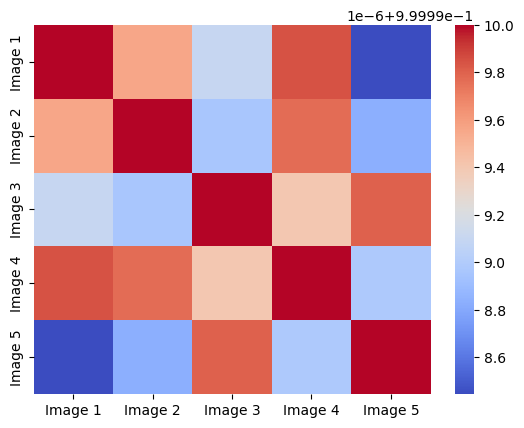

In [8]:
# create histogram and correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', xticklabels=[
            'Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5'], yticklabels=['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5'])
plt.show()


# pitch scale

In [9]:
#load images
img6 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pitch_class_scatter/n1_scatter_0-50.png', 0)
img7 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pitch_class_scatter/n2_scatter_0-50.png', 0)
img8 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pitch_class_scatter/n3_scatter_0-50.png', 0)
img9 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pitch_class_scatter/n4_scatter_0-50.png', 0)
img10 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/Github/AMPLab/ethnonmusicology/assets/pitch_class_scatter/n5_scatter_0-50.png', 0)


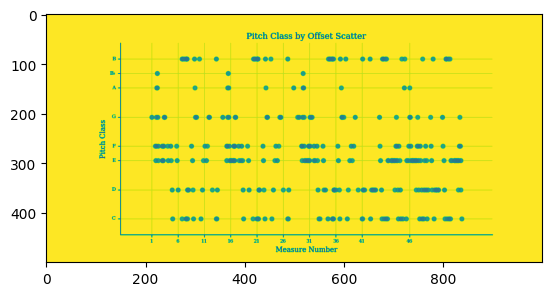

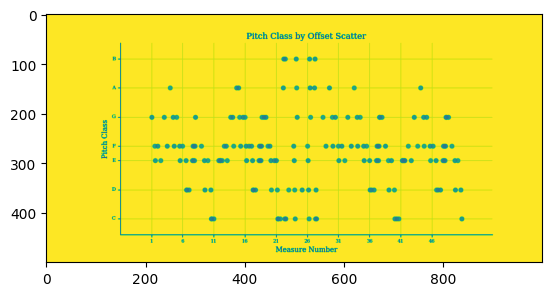

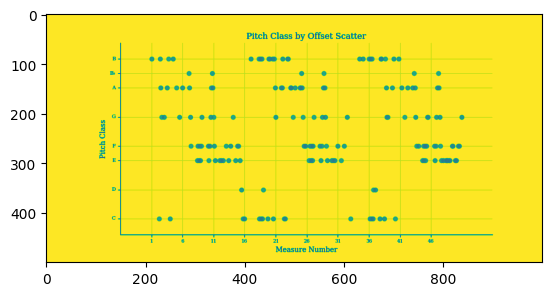

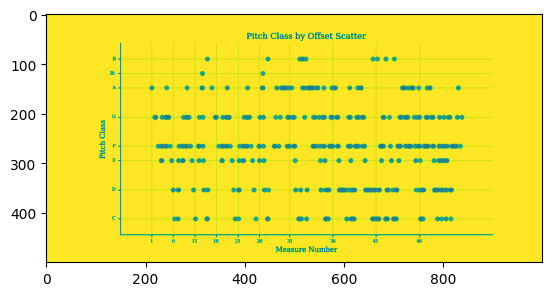

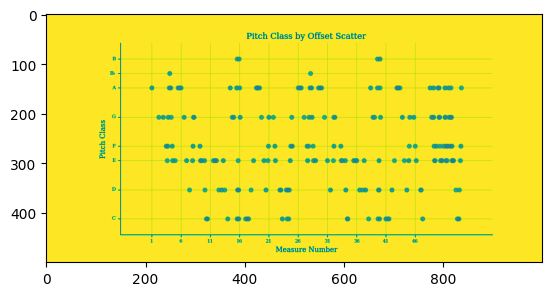

In [10]:
# display images
images_pitch_scale = [img6, img7, img8, img9, img10]
for i in images_pitch_scale:
    imgplot = plt.imshow(i)
    plt.show()


In [11]:
# create histogram and correlation matrix

histograms_pitch_class = [exposure.histogram(
    img)[0] for img in images_pitch_scale]


# Compute correlation matrix
num_images_pitch_class = len(images_pitch_scale)
corr_matrix_pitch_class = np.zeros((num_images_pitch_class, num_images_pitch_class))
for i in range(num_images_pitch_class):
    for j in range(i, num_images_pitch_class):
        corr_matrix_pitch_class[i, j] = corr_matrix_pitch_class[j, i] = np.corrcoef(
            histograms_pitch_class[i], histograms_pitch_class[j])[0, 1]

print(corr_matrix_pitch_class)


[[1.         0.99999781 0.99999496 0.99999902 0.99999679]
 [0.99999781 1.         0.99999212 0.99999722 0.99999417]
 [0.99999496 0.99999212 1.         0.99999107 0.99999972]
 [0.99999902 0.99999722 0.99999107 1.         0.9999936 ]
 [0.99999679 0.99999417 0.99999972 0.9999936  1.        ]]


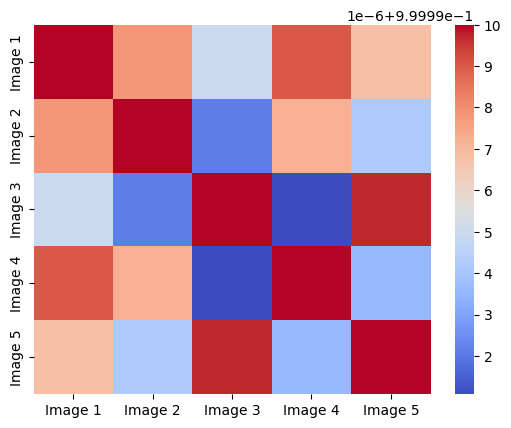

In [12]:
# plot the heatmap of correlation matrix
sns.heatmap(corr_matrix_pitch_class, annot=False, cmap='coolwarm', xticklabels=[
            'Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5'], yticklabels=['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5'])
plt.show()
